In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df_rpkm = read.table("../analysis/translation/HepG2_RiboSeq_rpkm.txt")
df_si_vivo = read.table("../analysis/translation/G1_kethoxal-HepG2_M13_C01_span-index.txt")
df_si_vitro = read.table("../analysis/translation/G1_kethoxal-HepG2-refold_M13_C01_span-index.txt")
df_summary = read.table("../analysis/transfreq/data/hrefseq/G1_kethoxal-HepG2_M13_B01.txt")
df_summary_subset = df_summary[,c(1,2,4,11)]

In [3]:
df = merge(df_rpkm, df_si_vivo, by=1)
df = merge(df, df_si_vitro, by=1)
df = merge(df, df_summary_subset, by=1)
colnames(df) = c("iid", "size", "riboseq1", "riboseq2", "input1", "input2",
                "ribo_rpkm1", "ribo_rpkm2", "input_rpkm1", "input_rpkm2", "l2fc",
                 "span_vivo", "span_vitro", "gene", "category", "cpkm")

Warning message in merge.data.frame(df, df_summary_subset, by = 1):
“column names ‘V2.x’, ‘V2.y’ are duplicated in the result”


In [4]:
head(df)

,iid,size,riboseq1,riboseq2,input1,input2,ribo_rpkm1,ribo_rpkm2,input_rpkm1,input_rpkm2,l2fc,span_vivo,span_vitro,gene,category,cpkm
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
1,NM_000014,4945,2281,2886,2571,3000,1.419394e-05,1.690766e-05,1.374248e-05,1.746474e-05,-0.004595676,0.2594697,0.3905669,A2M,protein_coding,1.95141964
2,NM_000015,1317,4,9,13,12,9.345839e-08,1.979750e-07,2.609078e-07,2.623026e-07,-0.139010144,0.0000000,0.0000000,NAT2,protein_coding,0.00000000
3,NM_000016,2623,113,105,56,73,1.325636e-06,1.159697e-06,5.643118e-07,8.011828e-07,0.414396495,0.2101736,0.2698830,ACADM,protein_coding,0.01229033
4,NM_000017,1964,65,78,55,75,1.018394e-06,1.150553e-06,7.402026e-07,1.099327e-06,0.118753627,0.4226009,0.5174248,ACADS,protein_coding,0.03829986
5,NM_000018,2296,255,303,185,195,3.417530e-06,3.823176e-06,2.129753e-06,2.444949e-06,0.491077609,0.4222594,0.5782440,ACADVL,protein_coding,0.24337283
6,NM_000019,2149,193,204,283,354,2.763535e-06,2.750092e-06,3.480803e-06,4.742135e-06,-0.444228369,0.2620050,0.3592503,ACAT1,protein_coding,0.03000236


In [5]:
df_sub = df[(df$category=="protein_coding")&(df$cpkm>0.5),]

In [13]:
fit = lm(log2(df_sub$span_vitro/df_sub$span_vivo)~df_sub$l2fc)
fit_x = seq(-4, 3, 1)
fit_y = fit$coefficients[1] + (fit_x * fit$coefficients[2])
fitted = data.frame(X=fit_x, Y=fit_y)

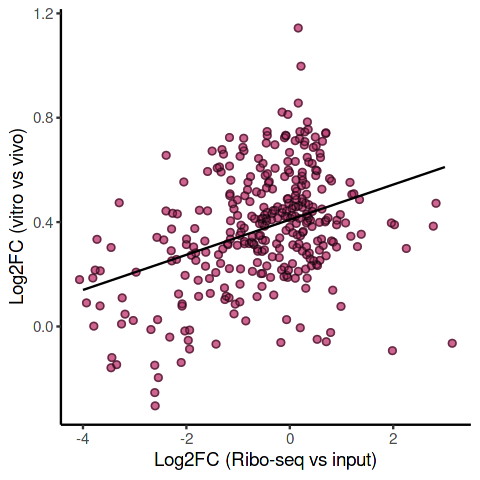

In [14]:
options(repr.plot.height=4, repr.plot.width=4)
p = ggplot(df_sub) + 
      geom_point(aes(x=l2fc, y=log2(span_vitro/span_vivo)), color="#c23f76", size=1.5, alpha=0.8) + 
      geom_point(aes(x=l2fc, y=log2(span_vitro/span_vivo)), color="black", shape=1, size=1.5, alpha = 0.5) + 
      geom_line(data=fitted, mapping=aes(x=X, y=Y)) + 
      #scale_color_manual(values=c("#c23f76")) +
      theme_classic() + xlab("Log2FC (Ribo-seq vs input)") + ylab("Log2FC (vitro vs vivo)") #+ ylab("Span (in vitro) - Span (in vivo)")
p

In [15]:
cor(df_sub$l2fc, df_sub$span_vitro-df_sub$span_vivo, method=c("pearson"))
cor(df_sub$l2fc, df_sub$span_vitro-df_sub$span_vivo, method=c("spearman"))

[1] 0.4633464

[1] 0.4524948